# Problem Statement:

Nowadays, shopping malls and Big Marts keep track of individual item sales data in order to forecast future client demand and adjust inventory management. In a data warehouse, these data stores hold a significant amount of consumer information and particular item details. By mining the data store from the data warehouse, more anomalies and common patterns can be discovered.

### 1.import libraies

In [1]:
# import libbares

import numpy as np  # create array
import pandas as pd  # for dataframe datamanupulation
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msn
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

#from pandas_profiling import ProfileReport

### 2.data collection and preprocessing

In [2]:
train_data=pd.read_csv("Train.csv")

test_data=pd.read_csv("Test.csv")

In [3]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
print("Features name in the data set: ","\n",train_data.columns)
print("======"*15)
print("Shape of the dataset(number of rows and columns):","\n",train_data.shape)
print("======"*15)
print("Information about the dataset: ","\n",train_data.info(),"\n")

train_numerical_features = train_data.select_dtypes(include='number')
train_categorical_features = train_data.select_dtypes(include='object')

print("numerical columns:",train_numerical_features.columns,"\n")

print("categorical column:",train_categorical_features.columns)



Features name in the data set:  
 Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')
Shape of the dataset(number of rows and columns): 
 (8523, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establ

#### ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales'] are the numerical columns

#### ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier','Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'] are the categorical column


##### Item_Outlet_Sales target column

## 3. Train Data Information and Preprocessing

In [6]:
## numerical column summury

train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### The item_visibility column conatins 0 , that indiactes that the product visbility is less. it may be affected the sales.
#### Item_Weight is contain some missing value.
#### Outlet_Size  is contain some missing value.

In [7]:
## categorical column summury when include parameter object

train_data.describe(include="O")

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


## Cosider the item_visibility columns which contains zero.

In [8]:
num = 0
for i in train_data.columns:
    num += train_data[i][train_data[i]==0].count()
print("How many rows contains 0:",num)

#len(train_data[(train_data.values == 0).any(axis=1)].index.values.tolist())
print("Find the rows which contains 0: ",train_data[(train_data == 0).any(axis=1)].index,3*"\n")

df=train_data[(train_data.select_dtypes(include=['number','float64']) == 0).any(1)]
df

# item_Item_Visibility conatins some product which have 0 visibility mean its visibilty percent is zero.

How many rows contains 0: 526
Find the rows which contains 0:  Int64Index([   3,    4,    5,   10,   32,   33,   46,   60,   72,   79,
            ...
            8410, 8425, 8435, 8439, 8467, 8480, 8484, 8486, 8494, 8500],
           dtype='int64', length=526) 





,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
10,FDY07,11.800,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
32,FDP33,18.700,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064
...,...,...,...,...,...,...,...,...,...,...,...,...
8480,FDQ58,NaN,Low Fat,0.0,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020
8484,DRJ49,6.865,Low Fat,0.0,Soft Drinks,129.9652,OUT013,1987,High,Tier 3,Supermarket Type1,2324.9736
8486,FDR20,20.000,Regular,0.0,Fruits and Vegetables,46.4744,OUT010,1998,NaN,Tier 3,Grocery Store,45.2744
8494,NCI54,15.200,Low Fat,0.0,Household,110.4912,OUT017,2007,NaN,Tier 2,Supermarket Type1,1637.8680


Item_Visibility        0.0
Item_Type                 
Baking Goods            45
Breads                  17
Breakfast                3
Canned                  33
Dairy                   38
Frozen Foods            51
Fruits and Vegetables   87
Hard Drinks             17
Health and Hygiene      33
Household               51
Meat                    20
Others                  10
Seafood                  4
Snack Foods             68
Soft Drinks             34
Starchy Foods           15


Text(0.5, 0, 'Item_Type')

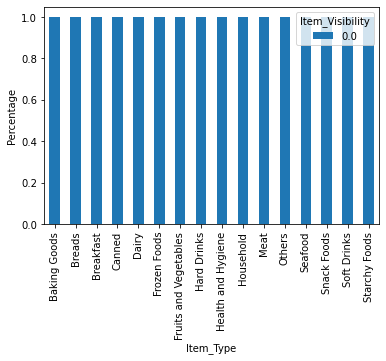

In [9]:
def crosstab(df,data):   
    print(pd.crosstab(df,data))
    Dependents=pd.crosstab(df,data)
    Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar")
    plt.xlabel("data")
    p = plt.ylabel('Percentage')
crosstab(df['Item_Type'],df['Item_Visibility'])
plt.xlabel("Item_Type")

Item_Visibility       0.0
Outlet_Location_Type     
Tier 1                144
Tier 2                169
Tier 3                213


Text(0.5, 0, 'Outlet_Location_Type')

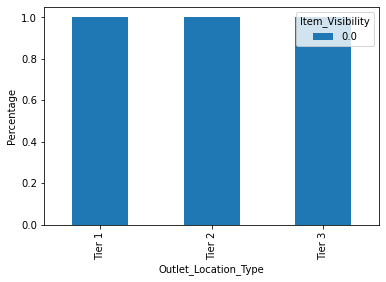

In [10]:
crosstab(df['Outlet_Location_Type'],df['Item_Visibility'])
plt.xlabel("Outlet_Location_Type")

In [11]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [12]:
train_data_num=train_data.select_dtypes(include="number")
train_data_num.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [13]:
train_data_cat=train_data.select_dtypes(include="object")
train_data_cat.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

## UNIVARIATE Analysis

Univariate analysis explores each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It describes the pattern of response to the variable. It describes each variable on its own. Descriptive statistics describe and summarize data.

In [14]:
def cat_Column(data):
    print("Unique data: ", data.unique(),"\n")
    print("Number of unique data: ", data.nunique(),"\n")
    print("What are values of unique data:","\n", data.value_counts(),"\n")
    plt.figure(figsize=(20,10))
    print(sns.countplot(data, data=data, palette='ocean'))

Unique data:  ['Low Fat' 'Regular' 'low fat' 'LF' 'reg'] 

Number of unique data:  5 

What are values of unique data: 
 Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


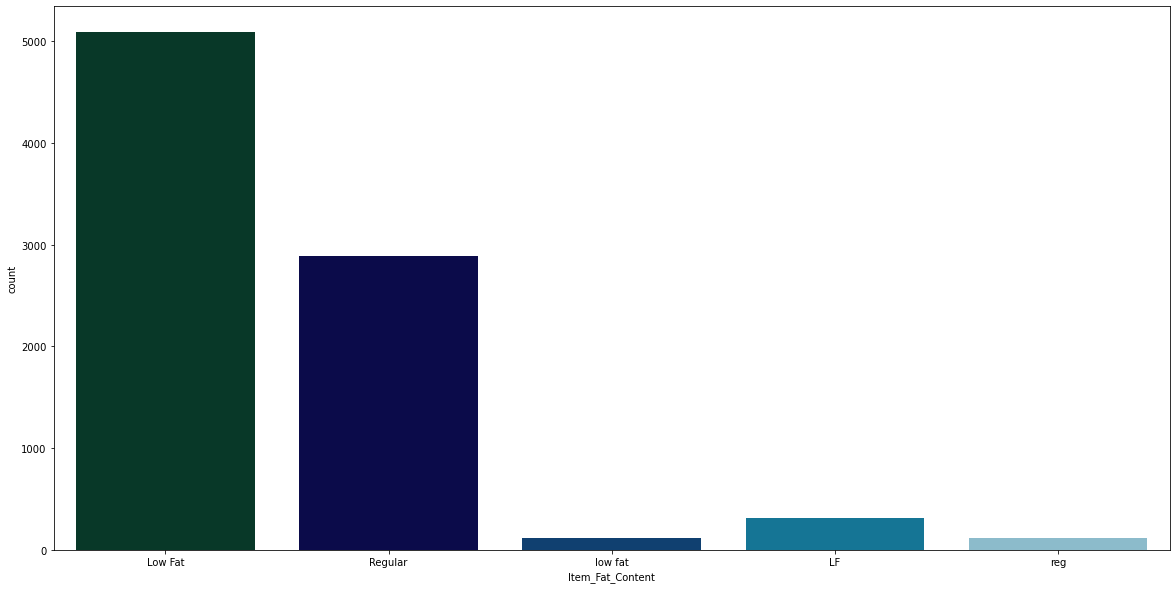

In [15]:
cat_Column(train_data["Item_Fat_Content"])

Item_Fat_Content: it conatins 'Low Fat' 'Regular' 'low fat' 'LF' 'reg it means the product either low fat or regular
Item_Fat_Content: Some of ‘Low Fat’ values mis-coded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’ are mentioned as ‘regular’.

In [16]:
# We see there are some irregularities in the column and it is needed to fix them.

train_data['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat', 'Low Fat', 'Regular'], inplace = True)

Unique data:  ['Low Fat' 'Regular'] 

Number of unique data:  2 

What are values of unique data: 
 Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


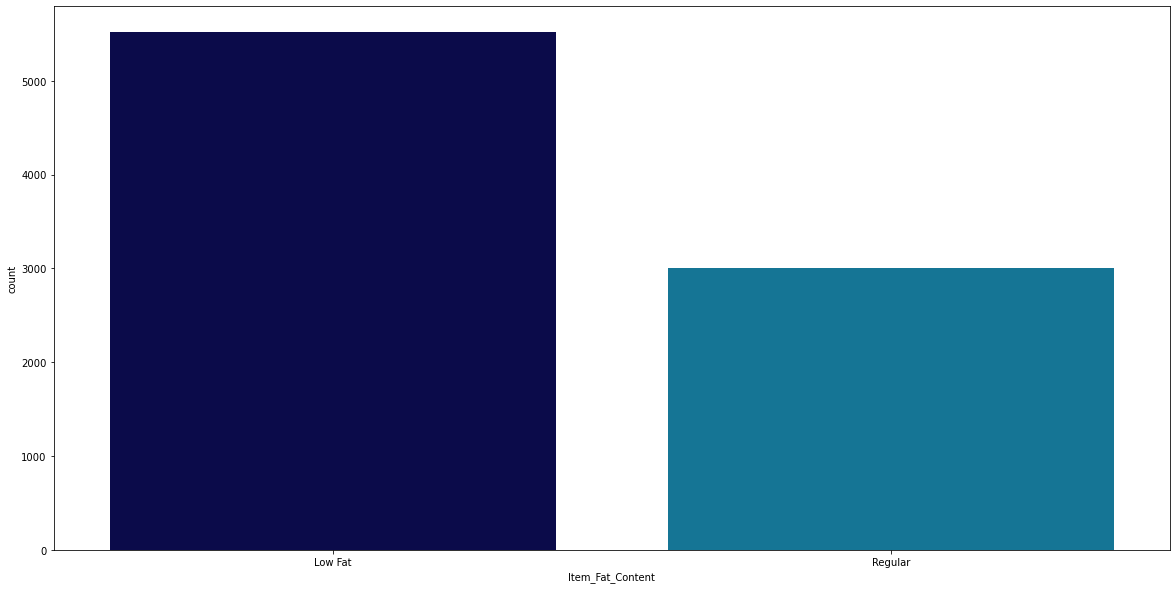

In [17]:
cat_Column(train_data["Item_Fat_Content"])

#### train_data['Item_Fat_Content'] in this column maximum number of low fat products are avilabele at the mart, so maximum people need the low fat product.

Unique data:  ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood'] 

Number of unique data:  16 

What are values of unique data: 
 Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


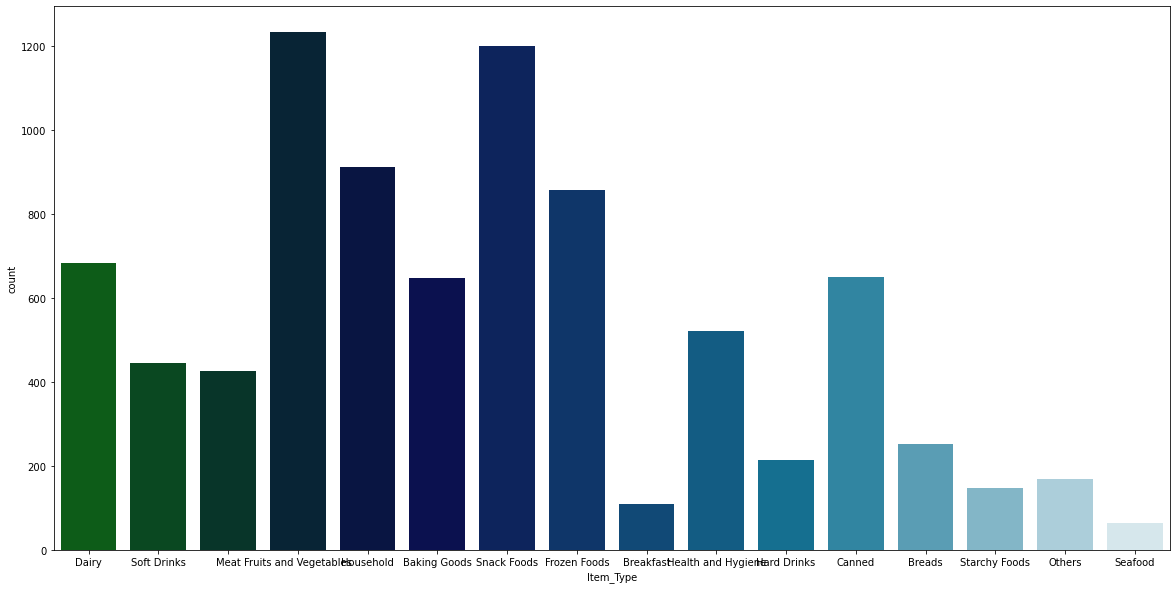

In [19]:
cat_Column(train_data["Item_Type"])

Item_Type :Fruits and Vegetables and Snack Foods  contains maximum means this demand is maximum.
In Item_Type maimum Fruits and Vegetables=1232 ,Snack Foods =1200 type and less Seafood=64 type product available in this plot concluded that maimum fruit item and snaks item sell is more and less amout of pepple need see food.

Unique data:  ['Medium' nan 'High' 'Small'] 

Number of unique data:  3 

What are values of unique data: 
 Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


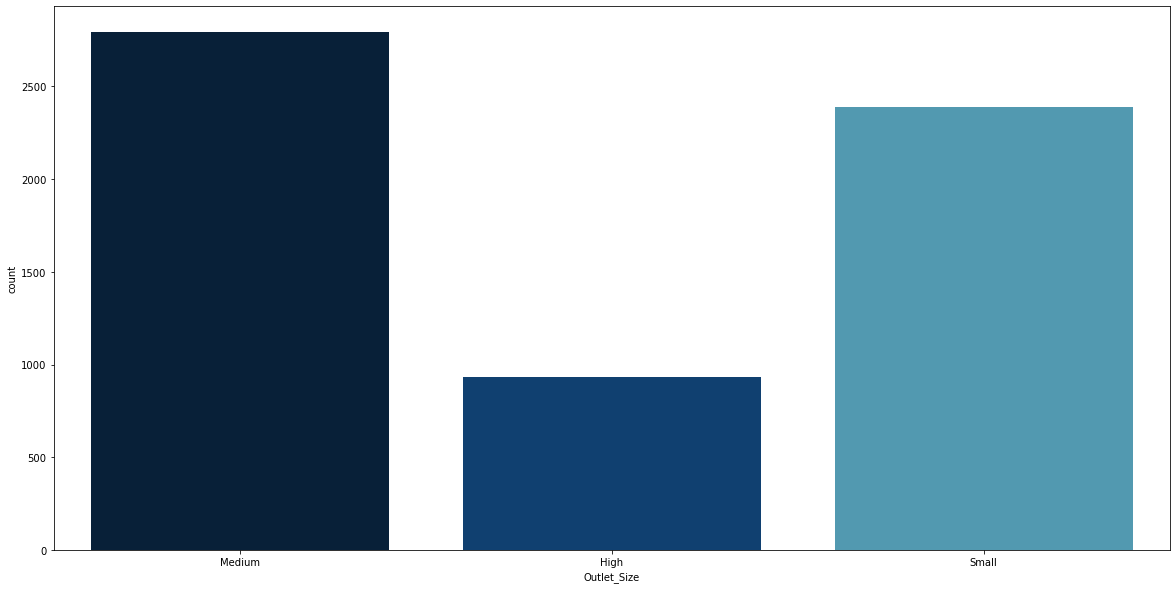

In [19]:
cat_Column(train_data["Outlet_Size"])

## The size of the store in terms of ground area covered maximum medium capacity

Unique data:  ['Tier 1' 'Tier 3' 'Tier 2'] 

Number of unique data:  3 

What are values of unique data: 
 Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


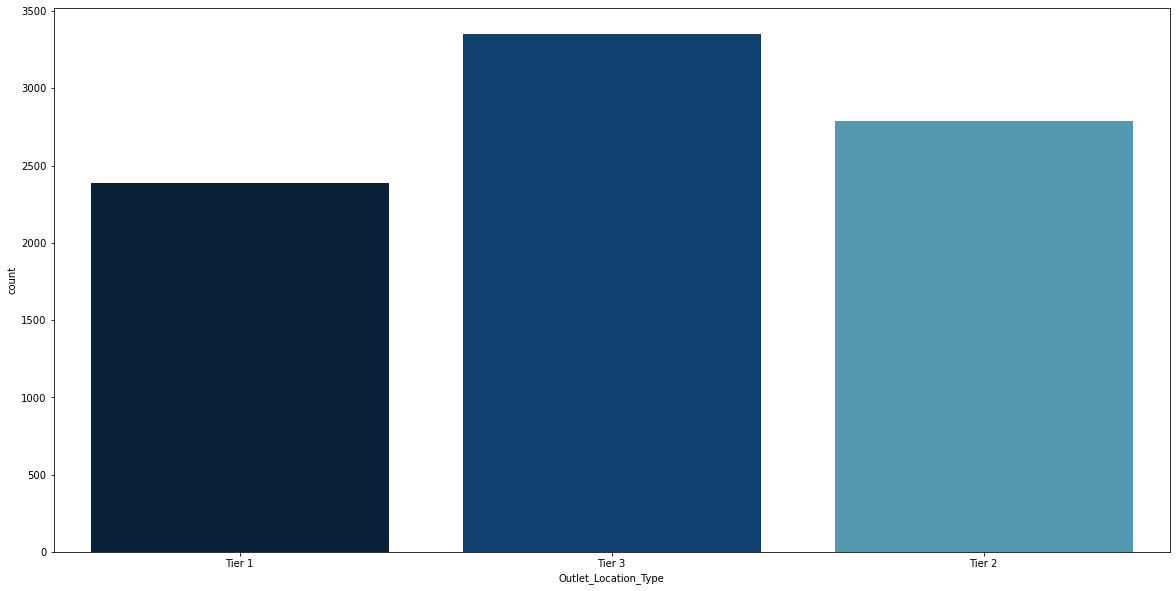

In [20]:
cat_Column(train_data["Outlet_Location_Type"])

Unique data:  ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3'] 

Number of unique data:  4 

What are values of unique data: 
 Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


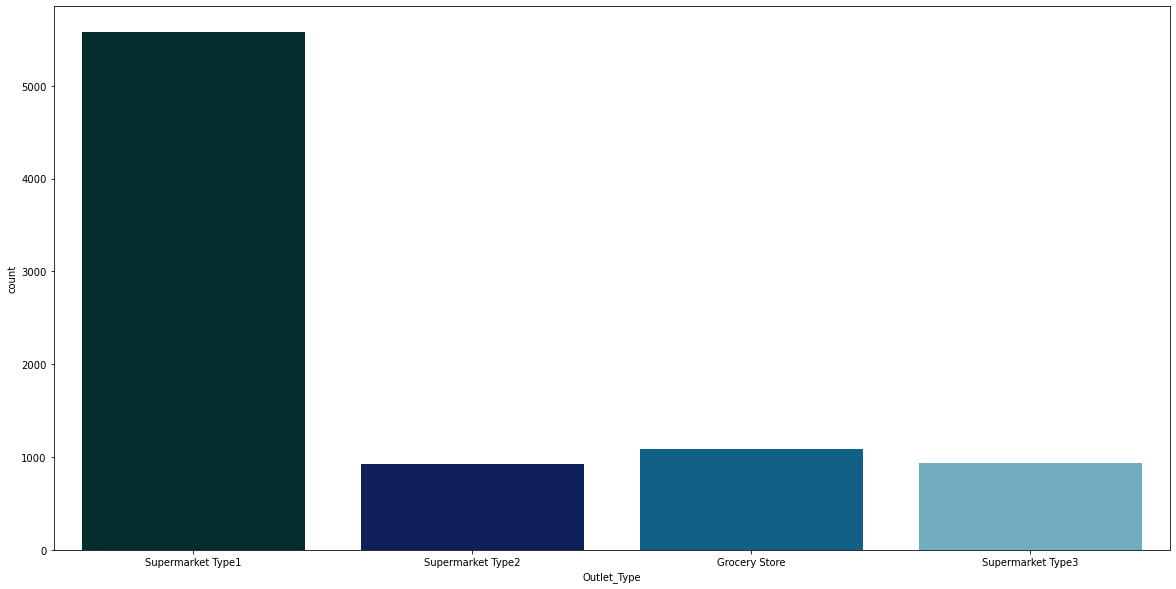

In [21]:
cat_Column(train_data["Outlet_Type"])

Unique data:  [1999 2009 1998 1987 1985 2002 2007 1997 2004] 

Number of unique data:  9 

What are values of unique data: 
 1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


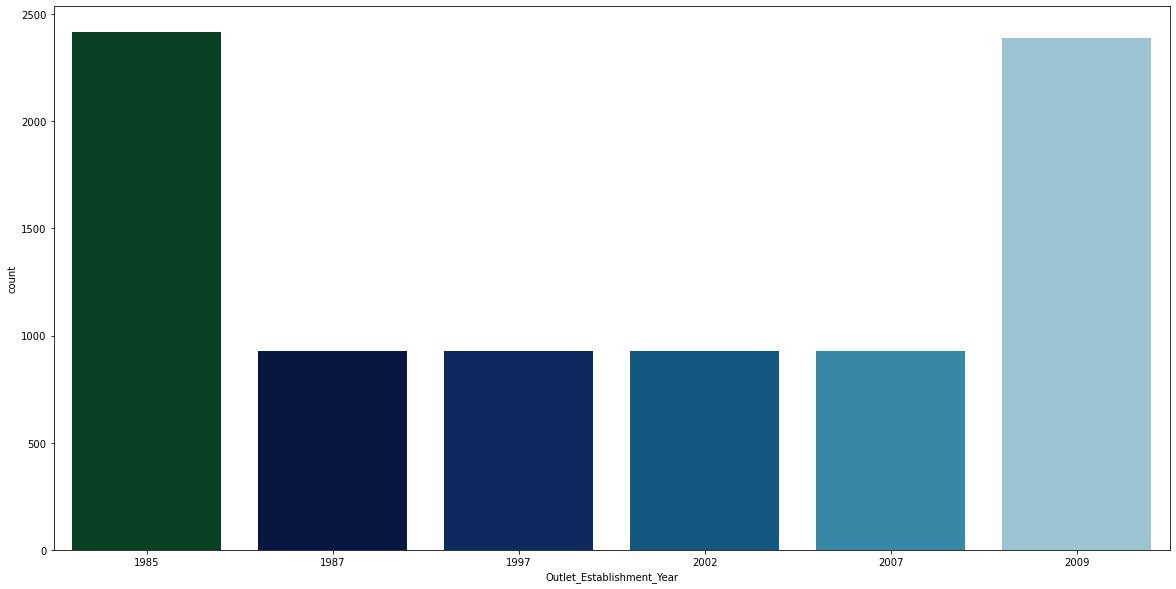

In [22]:
cat_Column(train_data['Outlet_Establishment_Year'])

In [23]:
def crosstab(df,data):   
    print(pd.crosstab(df,data))
    Dependents=pd.crosstab(df,data)
    Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar")
    plt.xlabel("data")
    p = plt.ylabel('Percentage')

Item_Fat_Content       Low Fat  Regular
Item_Type                              
Baking Goods               329      319
Breads                     140      111
Breakfast                   41       69
Canned                     341      308
Dairy                      418      264
Frozen Foods               450      406
Fruits and Vegetables      630      602
Hard Drinks                214        0
Health and Hygiene         520        0
Household                  910        0
Meat                       170      255
Others                     169        0
Seafood                     37       27
Snack Foods                692      508
Soft Drinks                374       71
Starchy Foods               82       66


Text(0.5, 0, 'Item_Type')

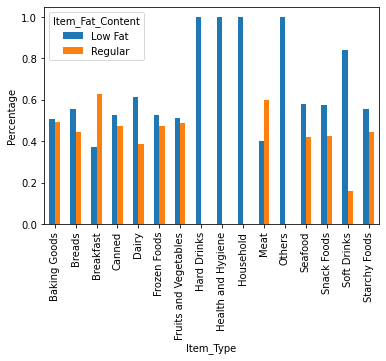

In [24]:
crosstab(train_data['Item_Type'],train_data['Item_Fat_Content'])
plt.xlabel("Item_Type")

Outlet_Location_Type  Tier 1  Tier 2  Tier 3
Outlet_Type                                 
Grocery Store            528       0     555
Supermarket Type1       1860    2785     932
Supermarket Type2          0       0     928
Supermarket Type3          0       0     935


Text(0.5, 0, 'Outlet_Location_Type')

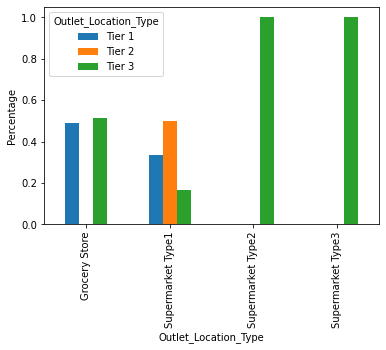

In [25]:
crosstab(train_data['Outlet_Type'],train_data['Outlet_Location_Type'])
plt.xlabel("Outlet_Location_Type")


Outlet_Type       Grocery Store  Supermarket Type1  Supermarket Type2  \
Item_Fat_Content                                                        
Low Fat                     705               3609                598   
Regular                     378               1968                330   

Outlet_Type       Supermarket Type3  
Item_Fat_Content                     
Low Fat                         605  
Regular                         330  


Text(0.5, 0, 'Outlet_Location_Type')

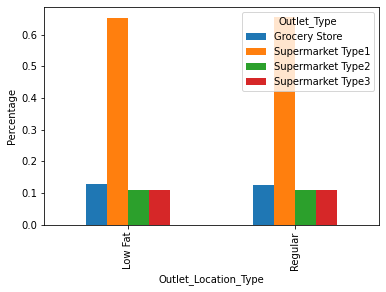

In [26]:

crosstab(train_data['Item_Fat_Content'],train_data['Outlet_Type'])
plt.xlabel("Outlet_Location_Type")



Outlet_Location_Type  Tier 1  Tier 2  Tier 3
Item_Fat_Content                            
Low Fat                 1540    1809    2168
Regular                  848     976    1182


Text(0.5, 0, 'Outlet_Location_Type')

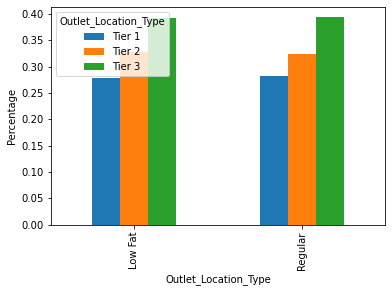

In [27]:
crosstab(train_data['Item_Fat_Content'],train_data['Outlet_Location_Type'])
plt.xlabel("Outlet_Location_Type")



Outlet_Type            Grocery Store  Supermarket Type1  Supermarket Type2  \
Item_Type                                                                    
Baking Goods                      85                426                 68   
Breads                            33                160                 27   
Breakfast                         19                 68                 12   
Canned                            73                426                 78   
Dairy                             92                450                 73   
Frozen Foods                     103                572                 92   
Fruits and Vegetables            152                805                135   
Hard Drinks                       24                145                 22   
Health and Hygiene                67                335                 58   
Household                        119                597                 95   
Meat                              66                257         

Text(0.5, 0, 'Outlet_Typee')

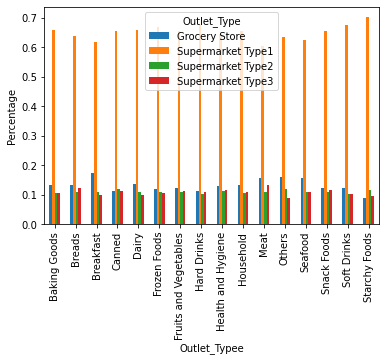

In [28]:
crosstab(train_data['Item_Type'],train_data['Outlet_Type'])
plt.xlabel("Outlet_Typee")

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

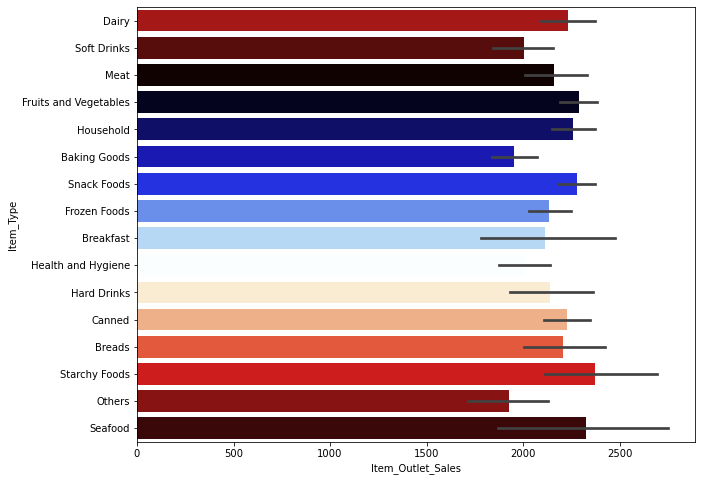

In [29]:
# Compare the column with target

plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type', x='Item_Outlet_Sales', data=train_data, palette= 'flag')


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Fat_Content'>

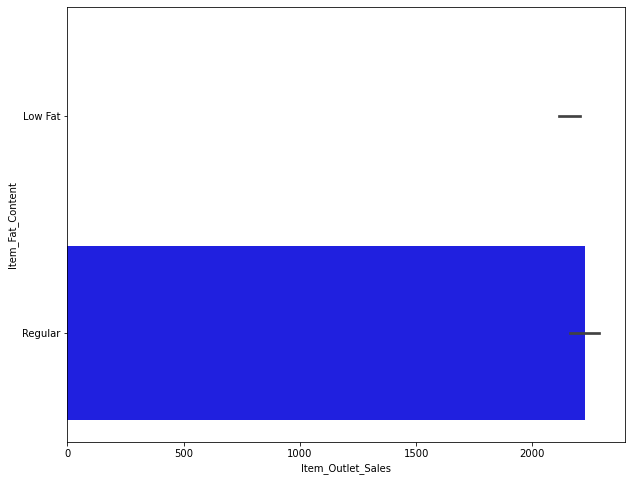

In [30]:

plt.figure(figsize=(10,8))
sns.barplot(y='Item_Fat_Content', x='Item_Outlet_Sales', data=train_data, palette= 'flag')



In [31]:
## The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers.



<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

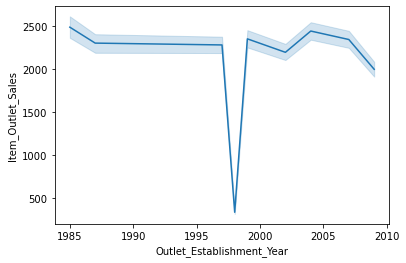

In [32]:
sns.lineplot(data=train_data, x="Outlet_Establishment_Year", y="Item_Outlet_Sales")

In [33]:
# compare with target
#Impact of various attributes on Item Outlet Sales

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

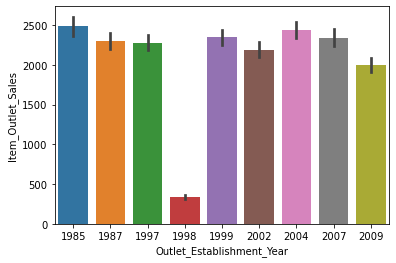

In [34]:
sns.barplot(data=train_data, x="Outlet_Establishment_Year", y="Item_Outlet_Sales")

It is noted that the outlet established in the year 2004 has the highest Sales.

In [35]:
train_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

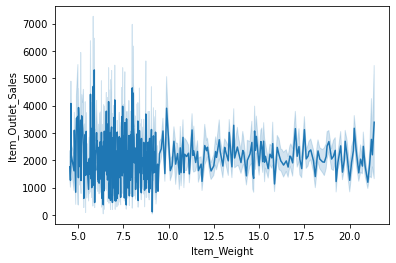

In [36]:
sns.lineplot(data=train_data, x="Item_Weight", y="Item_Outlet_Sales")

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

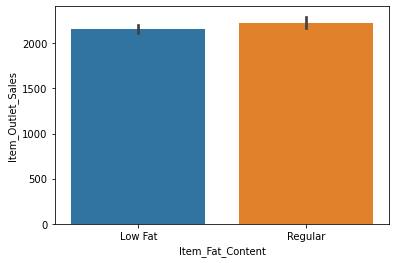

In [37]:
sns.barplot(data=train_data, x="Item_Fat_Content", y="Item_Outlet_Sales")

Item outlet sales for the Low Fat Content types of items are the highest.

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

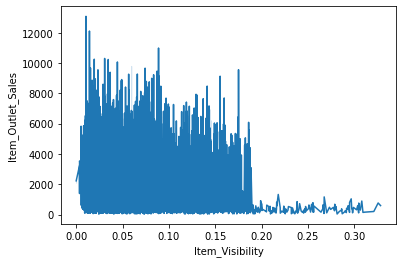

In [38]:
sns.lineplot(data=train_data, x="Item_Visibility", y="Item_Outlet_Sales")

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

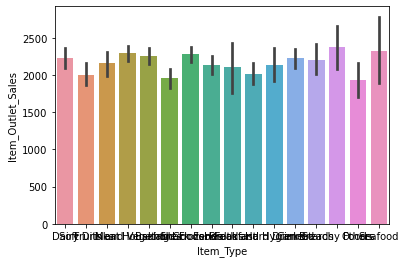

In [39]:
sns.barplot(data=train_data, x="Item_Type", y="Item_Outlet_Sales",linewidth=2.5)

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

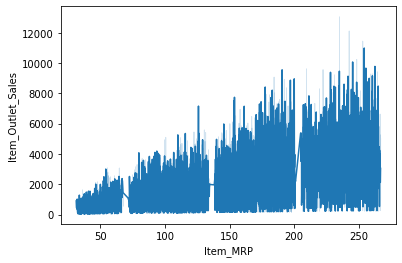

In [40]:
sns.lineplot(data=train_data, x="Item_MRP", y="Item_Outlet_Sales")

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

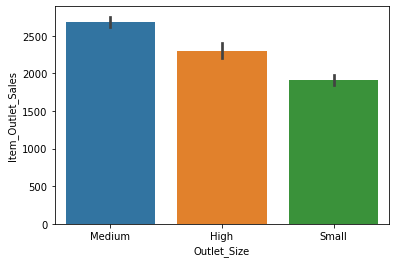

In [41]:
sns.barplot(data=train_data, x="Outlet_Size", y="Item_Outlet_Sales")

Medium sized outlets have the highest sales.

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

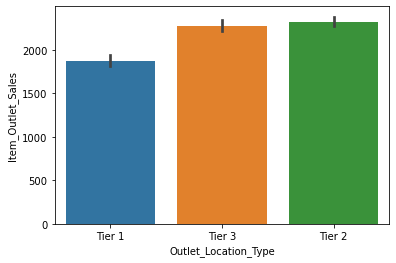

In [42]:
sns.barplot(data=train_data, x="Outlet_Location_Type", y="Item_Outlet_Sales")

Outlets belonging to the Tier2 location type have the largest sales.

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

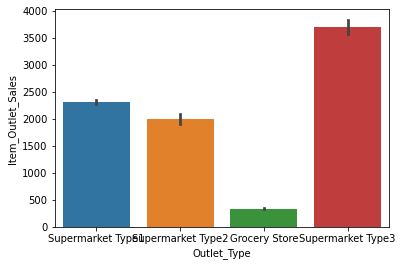

In [43]:
sns.barplot(data=train_data, x="Outlet_Type", y="Item_Outlet_Sales")

## Details Tier-3

In [44]:
dft=train_data[train_data["Outlet_Location_Type"]=="Tier 3"]
dft.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528


Outlet_Type           Grocery Store  Supermarket Type1  Supermarket Type2  \
Outlet_Location_Type                                                        
Tier 3                          555                932                928   

Outlet_Type           Supermarket Type3  
Outlet_Location_Type                     
Tier 3                              935  


Text(0.5, 0, 'Item_Type')

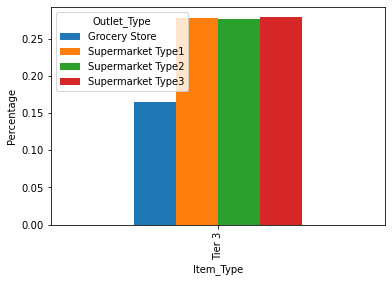

In [45]:
crosstab(dft['Outlet_Location_Type'],dft['Outlet_Type'])
plt.xlabel("Item_Type")

In [46]:
df2=train_data[train_data["Outlet_Location_Type"]=="Tier 2"]
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
19,FDU02,13.35,Low Fat,0.102492,Dairy,230.5352,OUT035,2004,Small,Tier 2,Supermarket Type1,2748.4224
22,NCB30,14.60,Low Fat,0.025698,Household,196.5084,OUT035,2004,Small,Tier 2,Supermarket Type1,1587.2672
25,NCD06,13.00,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080


Outlet_Type           Supermarket Type1
Outlet_Location_Type                   
Tier 2                             2785


Text(0.5, 0, 'Item_Type')

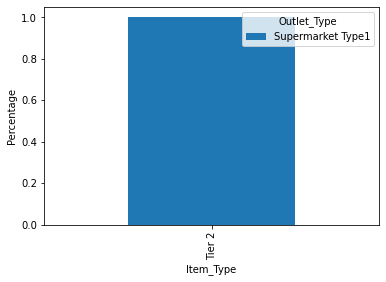

In [47]:
crosstab(df2['Outlet_Location_Type'],df2['Outlet_Type'])
plt.xlabel("Item_Type")

In [48]:
df1=train_data[train_data["Outlet_Location_Type"]=="Tier 1"]
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
10,FDY07,11.8,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
11,FDA03,18.5,Regular,0.045464,Dairy,144.1102,OUT046,1997,Small,Tier 1,Supermarket Type1,2187.1530
12,FDX32,15.1,Regular,0.100014,Fruits and Vegetables,145.4786,OUT049,1999,Medium,Tier 1,Supermarket Type1,1589.2646


Outlet_Type           Grocery Store  Supermarket Type1
Outlet_Location_Type                                  
Tier 1                          528               1860


Text(0.5, 0, 'Item_Type')

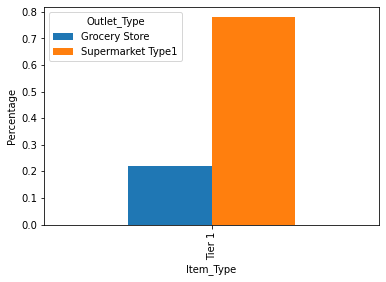

In [49]:
crosstab(df1['Outlet_Location_Type'],df1['Outlet_Type'])
plt.xlabel("Item_Type")

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

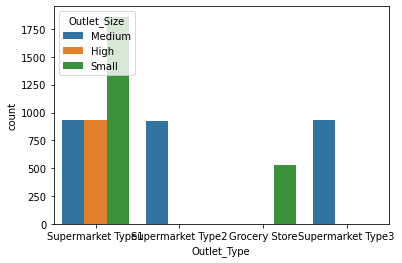

In [50]:
sns.countplot(x="Outlet_Type",hue="Outlet_Size",data=train_data)


### What is Data Manipulation? Data manipulation is the process of changing or altering data in order to make it more readable and organized. For example, you can arrange data alphabetically to expedite the process of finding useful information.


### Data blending is a method of gathering data from different sources and combining it into one easily consumable dataset.

### Data blending is a process whereby big data from multiple sources are merged into a single data warehouse or data set.

## 4. Missing Value_train_data

In [51]:
print("Number of missing values each columns: ","\n",train_data.isnull().sum())
print("======"*15)
print("percentage of missing values each columns: ","\n",train_data.isnull().sum()/len(train_data)*100)

Number of missing values each columns:  
 Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64
percentage of missing values each columns:  
 Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


<AxesSubplot:>

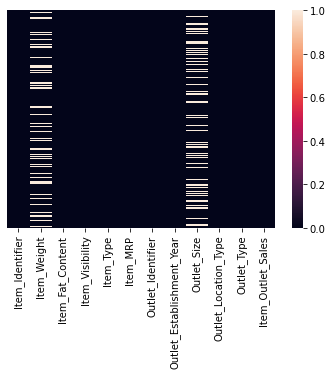

In [52]:
sns.heatmap(train_data.isnull(), yticklabels=False)

# shows that those column missing values

###  Fill the missing value Train_data:

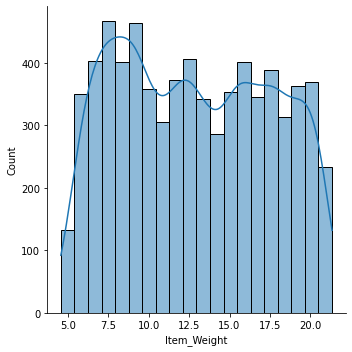

In [53]:
sns.displot(train_data, x="Item_Weight", kde=True)

In [54]:
train_data["Item_Weight"].mode()

0    12.15
dtype: float64

In [55]:
train_data["Item_Weight"].median()

12.6

In [56]:
train_data["Item_Weight"].mean()

12.857645184136183

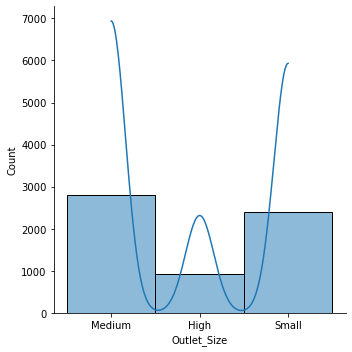

In [57]:
sns.displot(train_data, x="Outlet_Size", kde=True)

In [58]:
train_data["Outlet_Size"].mode()

0    Medium
dtype: object

In [59]:
train_data["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [60]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [61]:
# numeric columns
train_data.fillna(train_data.select_dtypes(include='float64').mean(), inplace=True)

#train_data["Item_Weight"].fillna(train_data["Item_Weight"].mean(), inplace=True)

# train_data["Item_Weight"] is a numerical column so we will fill the null value with mean imputation

# categorical columns
train_data.fillna(train_data.select_dtypes(include='object').mode().iloc[0], inplace=True)

#train_data["Outlet_Size"].fillna(train_data["Outlet_Size"].mode(), inplace=True) # category

# train_data["Outlet_Size"] is a category column so we will fill the null value with mode imputation

In [62]:
train_data.select_dtypes(include='object').mode().iloc[0]

Item_Identifier                         FDG33
Item_Fat_Content                      Low Fat
Item_Type               Fruits and Vegetables
Outlet_Identifier                      OUT027
Outlet_Size                            Medium
Outlet_Location_Type                   Tier 3
Outlet_Type                 Supermarket Type1
Name: 0, dtype: object

<AxesSubplot:>

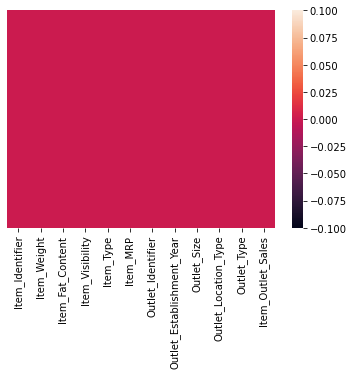

In [63]:
sns.heatmap(train_data.isnull(), yticklabels=False)


In [64]:
train_data["Outlet_Size"].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [65]:
train_data["Outlet_Size"].mode()

0    Medium
dtype: object

In [66]:
train_data.select_dtypes(include='float64').mean()

Item_Weight            12.857645
Item_Visibility         0.066132
Item_MRP              140.992782
Item_Outlet_Sales    2181.288914
dtype: float64

In [67]:
train_data.select_dtypes(include='number').mean()

Item_Weight                    12.857645
Item_Visibility                 0.066132
Item_MRP                      140.992782
Outlet_Establishment_Year    1997.831867
Item_Outlet_Sales            2181.288914
dtype: float64

In [68]:
train_data.select_dtypes(include='object').mode().iloc[0]

Item_Identifier                         FDG33
Item_Fat_Content                      Low Fat
Item_Type               Fruits and Vegetables
Outlet_Identifier                      OUT027
Outlet_Size                            Medium
Outlet_Location_Type                   Tier 3
Outlet_Type                 Supermarket Type1
Name: 0, dtype: object

In [69]:
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Feature selction based on general requiremnets

In [70]:

# In train Data set Item_Identifier and Outlet_Identifier these are unique:

train_data.drop(["Item_Identifier","Outlet_Identifier"],axis=1,inplace=True)
train_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [71]:
train_data.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

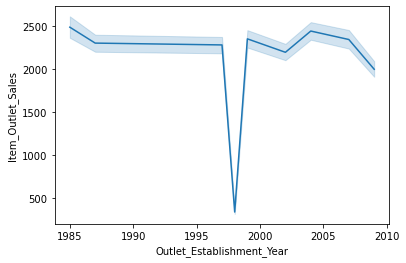

In [72]:
sns.lineplot(data=train_data, x="Outlet_Establishment_Year", y="Item_Outlet_Sales")

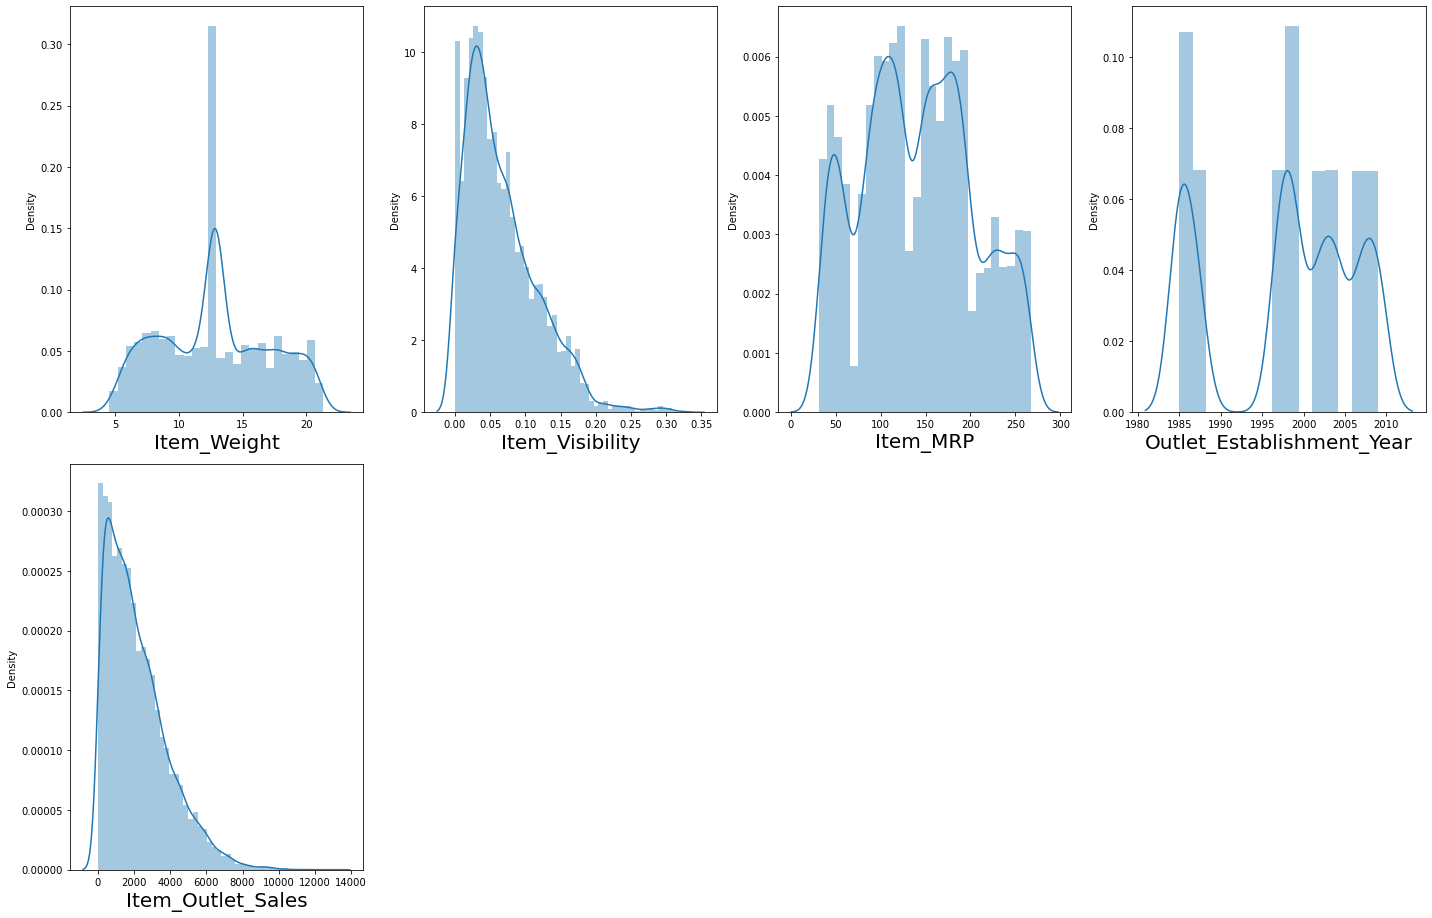

In [73]:
train_numerical_features = train_data.select_dtypes(include='number')

# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in train_numerical_features:
    if plotnumber<=12 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(train_numerical_features[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

# Train_data_Outlier

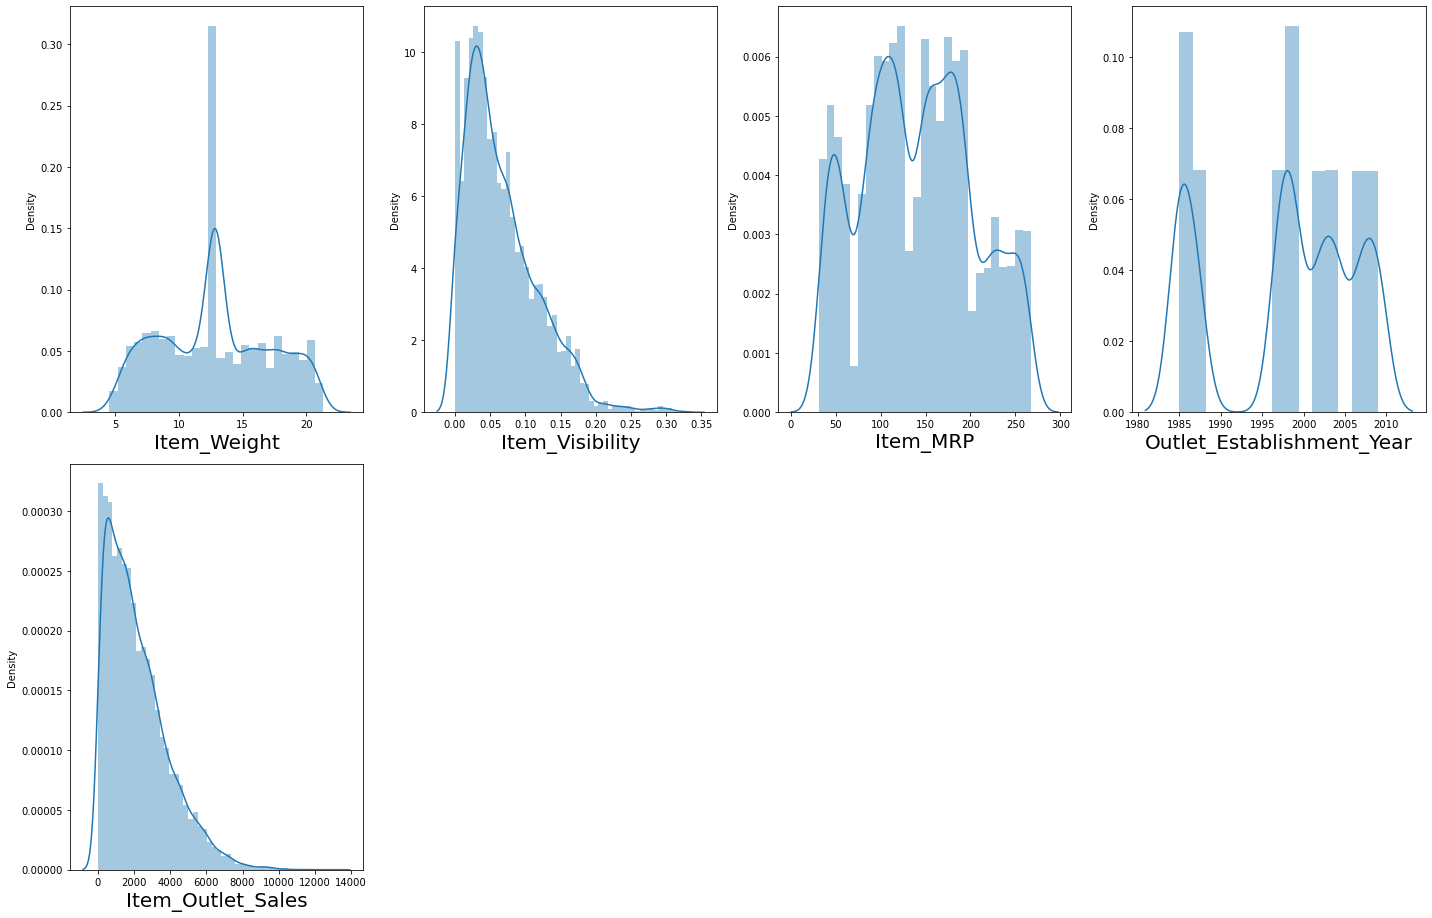

In [74]:
train_numerical_features = train_data.select_dtypes(include='number')

# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in train_numerical_features:
    if plotnumber<=12 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(train_numerical_features[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

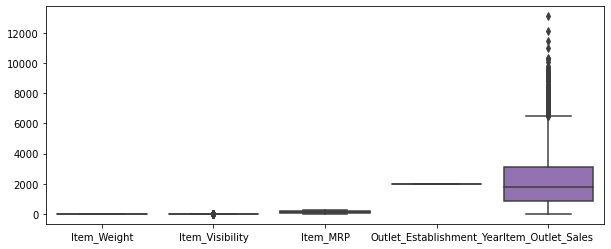

In [75]:
fig , ax = plt.subplots(figsize=(10,4))
sns.boxplot(data= train_numerical_features, ax = ax)
plt.show()

<AxesSubplot:xlabel='Item_Visibility'>

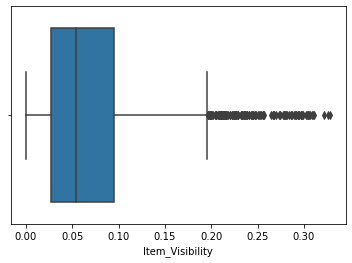

In [76]:
sns.boxplot(x=train_data["Item_Visibility"])

<AxesSubplot:xlabel='Item_MRP'>

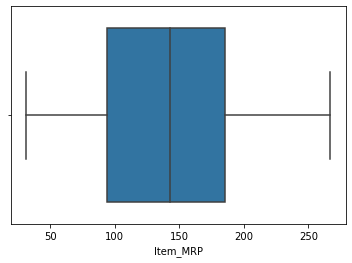

In [77]:
sns.boxplot(x=train_data["Item_MRP"])

<AxesSubplot:xlabel='Item_Weight'>

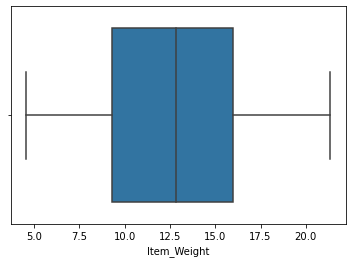

In [78]:
sns.boxplot(x=train_data["Item_Weight"])

In [79]:
 def mod_outlier(df):
        df1 = df.copy()
        df = df._get_numeric_data()


        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)

        iqr = q3 - q1

        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr)


        for col in df.columns:
            for i in range(0,len(df[col])):
                if df[col][i] < lower_bound[col]:            
                    df[col][i] = lower_bound[col]

                if df[col][i] > upper_bound[col]:            
                    df[col][i] = upper_bound[col]    


        for col in df.columns:
            df1[col] = df[col]

        return(df1)

### convert the categorical column to numerical columns(label encoding):

In [80]:
categorical_features = train_data.select_dtypes(include='object')

In [81]:
categorical_features.columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [82]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

for column in columns:
    train_data[column] = LabelEncoder().fit_transform(train_data[column])
    
    
#replace function or mapping function is also used  

In [83]:
train_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1987,0,2,1,994.7052


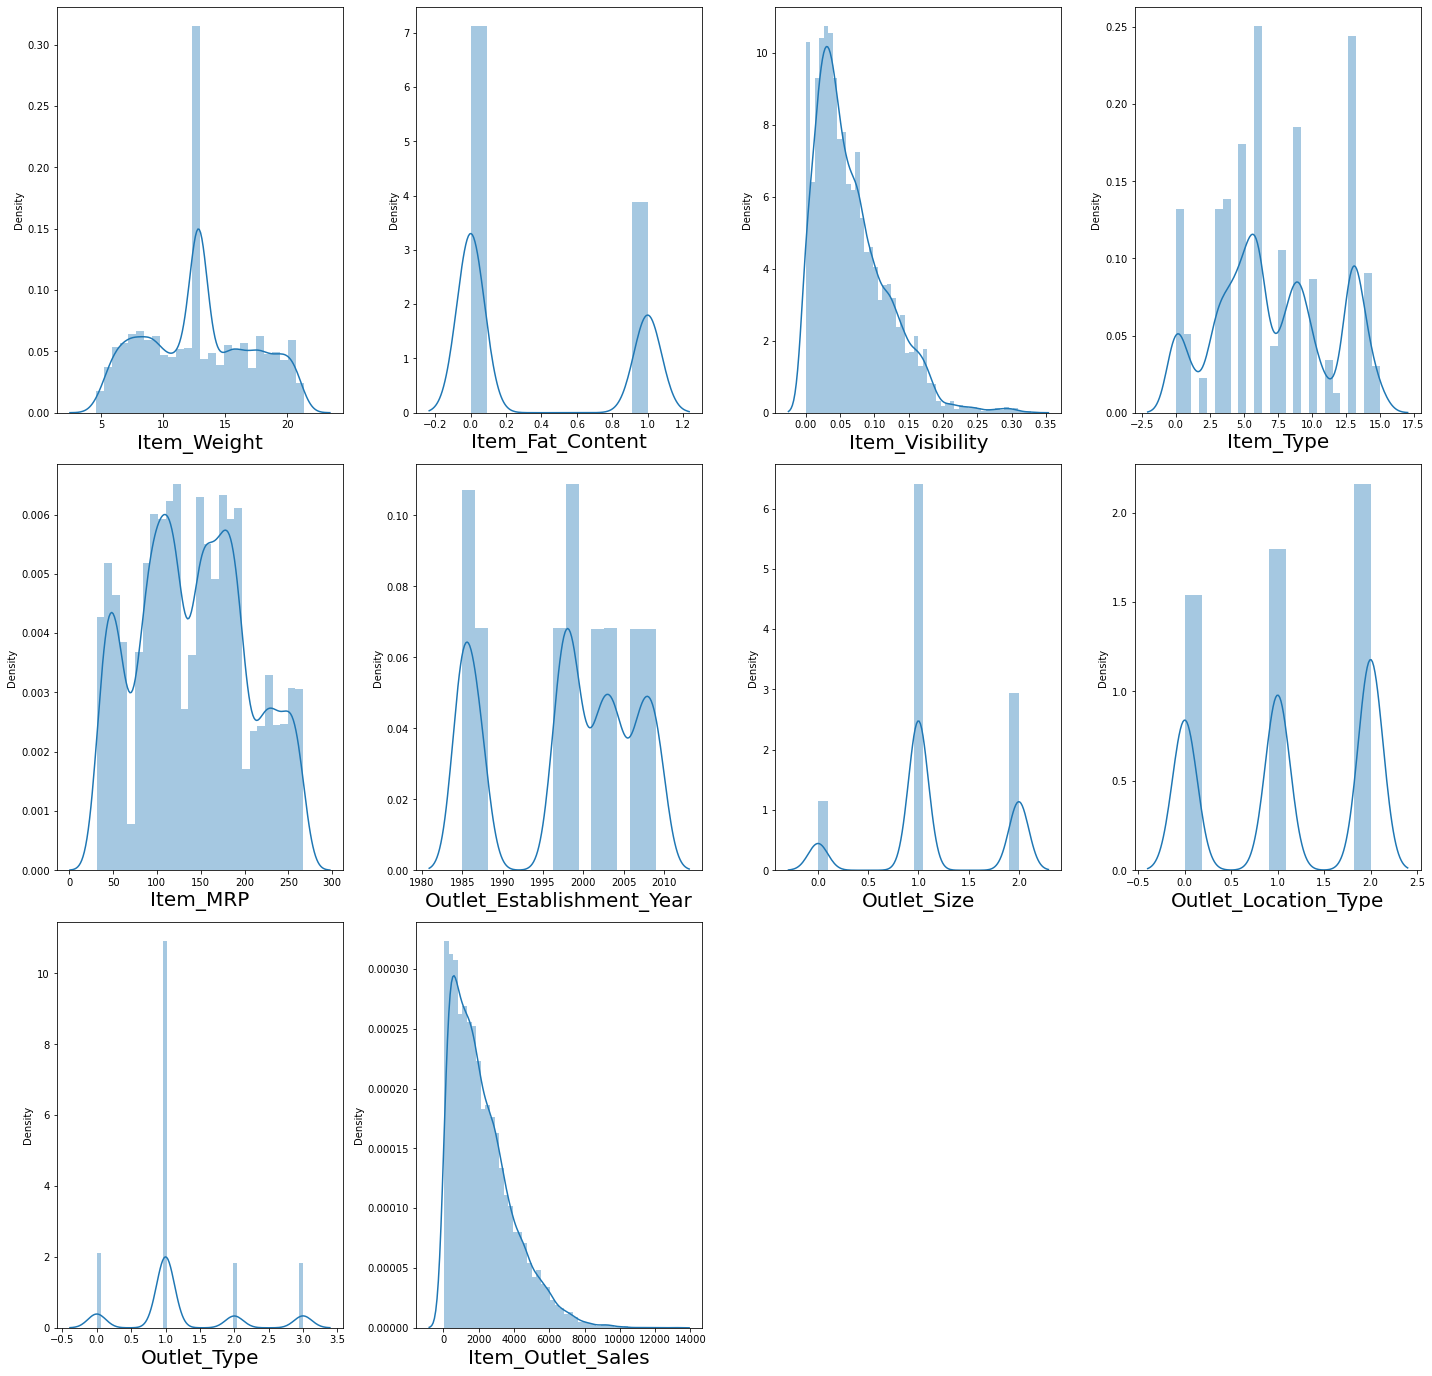

In [90]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in train_data:
    if plotnumber<=13 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(train_data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [91]:
train_data.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [92]:
corr=train_data.corr()
corr

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.021157,-0.012049,0.028015,0.024756,-0.008301,-0.007225,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.021157,1.000000,0.047314,-0.139434,0.006063,0.003151,-0.000622,-0.001598,0.002199,0.018719
Item_Visibility,-0.012049,0.047314,1.000000,-0.035249,-0.001315,-0.074834,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,0.028015,-0.139434,-0.035249,1.000000,0.032651,0.004970,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.024756,0.006063,-0.001315,0.032651,1.000000,0.005020,0.006059,0.000232,-0.001975,0.567574
Outlet_Establishment_Year,-0.008301,0.003151,-0.074834,0.004970,0.005020,1.000000,0.193389,-0.089216,-0.122304,-0.049135
Outlet_Size,-0.007225,-0.000622,0.069309,-0.001859,0.006059,0.193389,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.004088,-0.001598,-0.028099,0.003084,0.000232,-0.089216,-0.614311,1.000000,0.467219,0.089367
Outlet_Type,-0.000566,0.002199,-0.173468,0.003053,-0.001975,-0.122304,-0.201483,0.467219,1.000000,0.401522
Item_Outlet_Sales,0.011550,0.018719,-0.128625,0.017048,0.567574,-0.049135,-0.086182,0.089367,0.401522,1.000000


<AxesSubplot:>

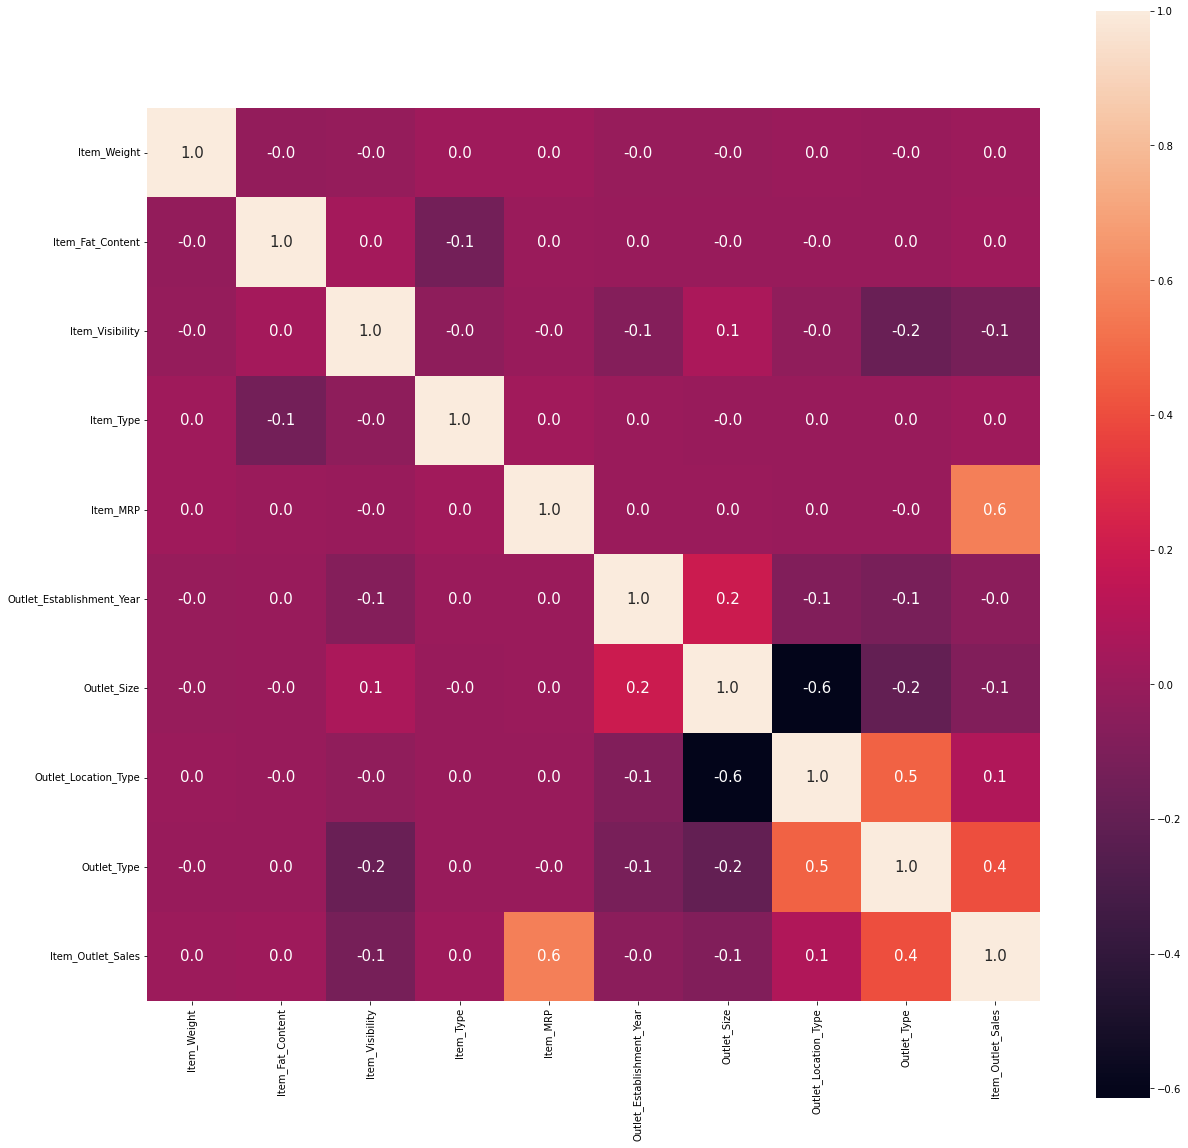

In [93]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15})

#### in this heatmap looks that there is no corealation between the independent variable

#### condtion(0.7< high)

# Test_data

In [94]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [95]:
print("Features name in the data set: ","\n",test_data.columns)
print("======"*15)
print("Shape of the dataset(number of rows and columns):","\n",test_data.shape)
print("======"*15)
print("Information about the dataset: ","\n",test_data.info())

Features name in the data set:  
 Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')
Shape of the dataset(number of rows and columns): 
 (5681, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 no

In [96]:
test_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [97]:
test_data.describe(include="O")

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5681,5681,5681,5681,4075,5681,5681
unique,1543,5,16,10,3,3,4
top,DRF48,Low Fat,Snack Foods,OUT027,Medium,Tier 3,Supermarket Type1
freq,8,3396,789,624,1862,2233,3717


In [98]:
test_numerical_features = test_data.select_dtypes(include='number')
test_categorical_features = test_data.select_dtypes(include='object')

In [99]:
test_numerical_features.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,20.750,0.007565,107.8622,1999
1,8.300,0.038428,87.3198,2007
2,14.600,0.099575,241.7538,1998
3,7.315,0.015388,155.0340,2007
4,NaN,0.118599,234.2300,1985


In [100]:
test_categorical_features.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,Low Fat,Snack Foods,OUT049,Medium,Tier 1,Supermarket Type1
1,FDW14,reg,Dairy,OUT017,NaN,Tier 2,Supermarket Type1
2,NCN55,Low Fat,Others,OUT010,NaN,Tier 3,Grocery Store
3,FDQ58,Low Fat,Snack Foods,OUT017,NaN,Tier 2,Supermarket Type1
4,FDY38,Regular,Dairy,OUT027,Medium,Tier 3,Supermarket Type3


# Missing value_test_data

In [101]:
print("Number of missing values each columns: ","\n",test_data.isnull().sum())
print("======"*15)
print("percentage of missing values each columns: ","\n",test_data.isnull().sum()/len(train_data)*100)

Number of missing values each columns:  
 Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64
percentage of missing values each columns:  
 Item_Identifier               0.000000
Item_Weight                  11.451367
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  18.843130
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64


In [102]:
test_data.isnull().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
dtype: bool

<AxesSubplot:>

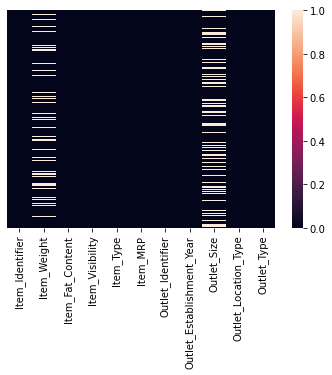

In [103]:
sns.heatmap(test_data.isnull(),yticklabels=False)

# Fill the missing value:

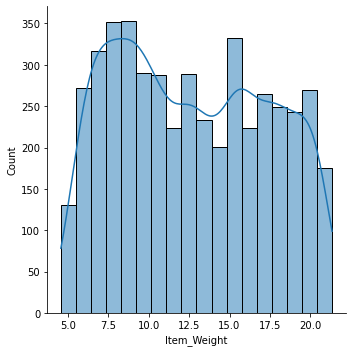

In [104]:
sns.displot(test_data, x="Item_Weight", kde=True)

In [105]:
test_data["Item_Weight"].mode()

0    10.5
dtype: float64

In [106]:
test_data["Item_Weight"].median()

12.5

In [107]:
test_data["Item_Weight"].mean()

12.695633368756374

In [108]:
test_data["Item_Weight"].value_counts()

10.500    57
17.600    53
15.600    48
20.250    47
19.350    46
          ..
6.980      1
6.320      1
5.465      1
5.945      1
7.670      1
Name: Item_Weight, Length: 410, dtype: int64

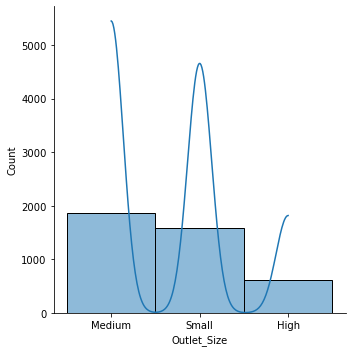

In [109]:
sns.displot(test_data, x="Outlet_Size", kde=True)

In [110]:
# numeric columns
test_data.fillna(test_data.select_dtypes(include='float64').mean(), inplace=True)

#test_data["Item_Weight"].fillna(test_data["Item_Weight"].mean(), inplace=True)

# categorical columns
test_data.fillna(test_data.select_dtypes(include='object').mode().iloc[0], inplace=True)

#test_data["Outlet_Size"].fillna(test_data["Outlet_Size"].mode(), inplace=True) # category

<AxesSubplot:>

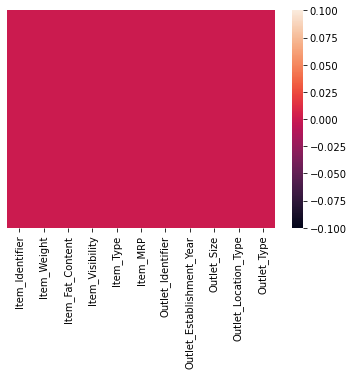

In [111]:
sns.heatmap(test_data.isnull(),yticklabels=False)

In [112]:
test_data["Outlet_Size"].value_counts()

Medium    3468
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [113]:
# We see there are some irregularities in the column and it is needed to fix them.

test_data['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat', 'Low Fat', 'Regular'], inplace = True)

In [114]:
test_data["Item_Fat_Content"].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [115]:
test_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [116]:
# In train Data set Item_Identifier and Outlet_Identifier these are unique:

test_data.drop(["Item_Identifier","Outlet_Identifier"],axis=1,inplace=True)
test_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300000,Regular,0.038428,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1
2,14.600000,Low Fat,0.099575,Others,241.7538,1998,Medium,Tier 3,Grocery Store
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1
4,12.695633,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3


In [117]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

for column in columns:
    test_data[column] = LabelEncoder().fit_transform(test_data[column])
    
    
#replace function or mapping function is also used  

In [118]:
test_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,0,0.007565,13,107.8622,1999,1,0,1
1,8.300000,1,0.038428,4,87.3198,2007,1,1,1
2,14.600000,0,0.099575,11,241.7538,1998,1,2,0
3,7.315000,0,0.015388,13,155.0340,2007,1,1,1
4,12.695633,1,0.118599,4,234.2300,1985,1,2,3
...,...,...,...,...,...,...,...,...,...
5676,10.500000,1,0.013496,13,141.3154,1997,2,0,1
5677,7.600000,1,0.142991,15,169.1448,2009,1,2,2
5678,10.000000,0,0.073529,8,118.7440,2002,1,1,1
5679,15.300000,1,0.000000,3,214.6218,2007,1,1,1


## Standardization

In [119]:
"""Sklearn requires the target variable in a separate dataset.
so, we will drop our target variable from the train dataset and save it in another dataset."""

X = train_data.drop(columns=['Item_Outlet_Sales'])
y=train_data["Item_Outlet_Sales"] 

test_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,0,0.007565,13,107.8622,1999,1,0,1
1,8.300000,1,0.038428,4,87.3198,2007,1,1,1
2,14.600000,0,0.099575,11,241.7538,1998,1,2,0
3,7.315000,0,0.015388,13,155.0340,2007,1,1,1
4,12.695633,1,0.118599,4,234.2300,1985,1,2,3
...,...,...,...,...,...,...,...,...,...
5676,10.500000,1,0.013496,13,141.3154,1997,2,0,1
5677,7.600000,1,0.142991,15,169.1448,2009,1,2,2
5678,10.000000,0,0.073529,8,118.7440,2002,1,1,1
5679,15.300000,1,0.000000,3,214.6218,2007,1,1,1


In [120]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,0,0.016047,4,249.8092,1999,1,0,1
1,5.920,1,0.019278,14,48.2692,2009,1,2,2
2,17.500,0,0.016760,10,141.6180,1999,1,0,1
3,19.200,1,0.000000,6,182.0950,1998,1,2,0
4,8.930,0,0.000000,9,53.8614,1987,0,2,1
...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1987,0,2,1
8519,8.380,1,0.046982,0,108.1570,2002,1,1,1
8520,10.600,0,0.035186,8,85.1224,2004,2,1,1
8521,7.210,1,0.145221,13,103.1332,2009,1,2,2


In [121]:
X.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.352693,0.066132,7.226681,140.992782,1997.831867,1.170832,1.112871,1.201220
std,4.226124,0.477836,0.051598,4.209990,62.275067,8.371760,0.600327,0.812757,0.796459
min,4.555000,0.000000,0.000000,0.000000,31.290000,1985.000000,0.000000,0.000000,0.000000
25%,9.310000,0.000000,0.026989,4.000000,93.826500,1987.000000,1.000000,0.000000,1.000000
50%,12.857645,0.000000,0.053931,6.000000,143.012800,1999.000000,1.000000,1.000000,1.000000
75%,16.000000,1.000000,0.094585,10.000000,185.643700,2004.000000,2.000000,2.000000,1.000000
max,21.350000,1.000000,0.328391,15.000000,266.888400,2009.000000,2.000000,2.000000,3.000000


In [122]:
from sklearn.preprocessing import StandardScaler

scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled

array([[-0.84187169, -0.73814723, -0.97073217, ..., -0.28458121,
        -1.36933384, -0.25265831],
       [-1.64170589,  1.35474328, -0.90811123, ..., -0.28458121,
         1.09156913,  1.00297245],
       [ 1.09855449, -0.73814723, -0.95691733, ..., -0.28458121,
        -1.36933384, -0.25265831],
       ...,
       [-0.53424315, -0.73814723, -0.59978449, ...,  1.38127431,
        -0.13888236, -0.25265831],
       [-1.33644372,  1.35474328,  1.53287976, ..., -0.28458121,
         1.09156913,  1.00297245],
       [ 0.45963367, -0.73814723, -0.41193591, ...,  1.38127431,
        -1.36933384, -0.25265831]])

In [123]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = X_scaled

vif = pd.DataFrame()
vif

vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["VIF"]

vif["Features"] = X.columns

vif["Features"]

vif

,VIF,Features
0,1.001913,Item_Weight
1,1.022404,Item_Fat_Content
2,1.061256,Item_Visibility
3,1.022474,Item_Type
4,1.001851,Item_MRP
5,1.069110,Outlet_Establishment_Year
6,1.712973,Outlet_Size
7,2.042615,Outlet_Location_Type
8,1.374013,Outlet_Type


In [124]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.2,random_state=101)

In [125]:
print('-'*30,' Shape of train and test dataset ','-'*30)
print('X train : {}, y train: {}'.format(x_train.shape, y_train.shape))
print('X test : {}, y test: {}'.format(x_test.shape, y_test.shape))
print('-'*100)

------------------------------  Shape of train and test dataset  ------------------------------
X train : (6818, 9), y train: (6818,)
X test : (1705, 9), y test: (1705,)
----------------------------------------------------------------------------------------------------


In [126]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression

### Model Selection:

In [127]:
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression()

In [128]:
y_hat=regression.predict(x_train)

print("Train data score",regression.score(x_train, y_train))
print("Train data r2_score",r2_score(y_train,y_hat))
print("Train data MSE:",mean_squared_error(y_train,y_hat))
print("Train data MAE:",mean_absolute_error(y_train,y_hat))
print("Train data RMSE:",np.sqrt(mean_squared_error(y_train,y_hat)))

Train data score 0.5085057750209295
Train data r2_score 0.5085057750209295
Train data MSE: 1453250.6680692416
Train data MAE: 904.3416066734294
Train data RMSE: 1205.5084686841656


In [129]:
y_hat_2=regression.predict(x_test)

print("Test data score",regression.score(x_test, y_test))
print("Test data r2_score",r2_score(y_test,y_hat_2)) # (coefficient of determination) regression score function.(1.0)
print("Test data MSE:",mean_squared_error(y_test,y_hat_2))
print("Test data MAE:",mean_absolute_error(y_test,y_hat_2))
print("Test data RMSE:", np.sqrt(mean_squared_error(y_test,y_hat_2)))

Test data score 0.5040717488447087
Test data r2_score 0.5040717488447087
Test data MSE: 1351585.369117519
Test data MAE: 880.9630396797251
Test data RMSE: 1162.577037928033


In [130]:
y_hat_2

array([2035.42799595, 2123.49261185, 1226.10179339, ..., 1269.90237555,
       2351.67647119, 2373.64397136])

In [131]:
y_test

8179     904.8222
8355    2795.6942
3411    1947.4650
7089     872.8638
6954    2450.1440
          ...    
1317    1721.0930
4996     914.8092
531      370.1848
3891    1358.2320
6629    2418.1856
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

In [132]:
predict_dataframe_tl=pd.DataFrame({"Real Values train":y_test, "Predicted Values train" :y_hat_2})
predict_dataframe_tl.head()

,Real Values train,Predicted Values train
8179,904.8222,2035.427996
8355,2795.6942,2123.492612
3411,1947.4650,1226.101793
7089,872.8638,530.958450
6954,2450.1440,2326.796644


# Model:2

In [133]:
#let's first visualize the tree on the data without doing any pre processing

model_1 = RandomForestRegressor()
model_1.fit(x_train, y_train)

RandomForestRegressor()

In [134]:
y_hat_1=model_1.predict(x_train)

print("Train data score",model_1.score(x_train, y_train))
print("Train data r2_score",r2_score(y_train,y_hat_1))
print("Train data MSE:",mean_squared_error(y_train,y_hat_1))
print("Train data MAE:",mean_absolute_error(y_train,y_hat_1))
print("Train data RMSE:",np.sqrt(mean_squared_error(y_train,y_hat_1)))

Train data score 0.9385311969348815
Train data r2_score 0.9385311969348815
Train data MSE: 181751.02489475647
Train data MAE: 295.23303197183924
Train data RMSE: 426.32267696517914


In [135]:
y_hat_3=model_1.predict(x_test)

print("Test data score",model_1.score(x_test, y_test))
print("Test data r2_score",r2_score(y_test,y_hat_3)) # (coefficient of determination) regression score function.(1.0)
print("Test data MSE:",mean_squared_error(y_test,y_hat_3))
print("Test data MAE:",mean_absolute_error(y_test,y_hat_3))
print("Test data RMSE:", np.sqrt(mean_squared_error(y_test,y_hat_3)))

Test data score 0.5486611279481024
Test data r2_score 0.5486611279481024
Test data MSE: 1230063.0475442114
Test data MAE: 780.3511399190617
Test data RMSE: 1109.082074304788


In [136]:
1147613.0745944243-159325.38025355717

988287.6943408672

In [137]:
predict_dataframe_test=pd.DataFrame({"Real Values train":y_test, "Predicted Values train" :y_hat_3})
predict_dataframe_test.head()

,Real Values train,Predicted Values train
8179,904.8222,1709.441500
8355,2795.6942,3694.470936
3411,1947.4650,1310.700538
7089,872.8638,458.117006
6954,2450.1440,2523.062416


# Model:3

In [138]:

from sklearn.tree import DecisionTreeRegressor

In [139]:
model_dt = DecisionTreeRegressor()
model_dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [140]:
y_hat_dt=model_dt.predict(x_train)

print("Train data score",model_dt.score(x_train, y_train))
print("Train data r2_score",r2_score(y_train,y_hat_dt))
print("Train data MSE:",mean_squared_error(y_train,y_hat_dt))
print("Train data MAE:",mean_absolute_error(y_train,y_hat_dt))
print("Train data RMSE:",np.sqrt(mean_squared_error(y_train,y_hat_dt)))

Train data score 1.0
Train data r2_score 1.0
Train data MSE: 1.4217545912812837e-30
Train data MAE: 2.5011771279322974e-17
Train data RMSE: 1.1923735116486292e-15


In [141]:
y_ha_dt=model_dt.predict(x_test)

print("Test data score",model_1.score(x_test, y_test))
print("Test data r2_score",r2_score(y_test,y_ha_dt)) # (coefficient of determination) regression score function.(1.0)
print("Test data MSE:",mean_squared_error(y_test,y_ha_dt))
print("Test data MAE:",mean_absolute_error(y_test,y_ha_dt))
print("Test data RMSE:", np.sqrt(mean_squared_error(y_test,y_ha_dt)))

Test data score 0.5486611279481024
Test data r2_score 0.16852440033561888
Test data MSE: 2266074.2812425327
Test data MAE: 1058.4158167741934
Test data RMSE: 1505.3485580564166


In [142]:
predict_dataframe_testdt=pd.DataFrame({"Real Values train":y_test, "Predicted Values train" :y_ha_dt})
predict_dataframe_testdt.head()

,Real Values train,Predicted Values train
8179,904.8222,2678.5134
8355,2795.6942,4137.2812
3411,1947.4650,1728.4168
7089,872.8638,243.6828
6954,2450.1440,2756.4120


## Model building by using feature importance:

The features in our data are directly influencing our Random Forest model and the result it achieves (i.e. the better the features we prepare and choose, the better final result we will achieve!). Hence we are going to explore and fine tune our Random Forest model by determining which of the features it had deemed to be important in our base model earlier.

In [143]:
model_2 = RandomForestRegressor()
model_2.fit(X, y)

RandomForestRegressor()

In [144]:
def feat_importance(m,df):
    importance = m.feature_importances_
    importance = pd.DataFrame(importance,index=df.columns,columns=["Importance"])
    return importance.sort_values(by=['Importance'],ascending=False)

In [145]:
importance = feat_importance(model_2,X)
importance[:]*100

,Importance
Item_MRP,45.477065
Outlet_Type,25.289255
Item_Visibility,11.347141
Item_Weight,5.679680
Item_Type,4.684113
Outlet_Establishment_Year,4.491745
Outlet_Size,1.076473
Outlet_Location_Type,1.014082
Item_Fat_Content,0.940447


In [146]:
np.sort(model_2.feature_importances_)*100

array([ 0.94044739,  1.01408187,  1.07647313,  4.49174461,  4.68411261,
        5.67968004, 11.34714104, 25.28925466, 45.47706466])

### Model building by using hyperparameter tuning and feature importance
### Feature Engineering and Hyperparameter tuning are essential steps within a Machine Learning Pipeline.¶

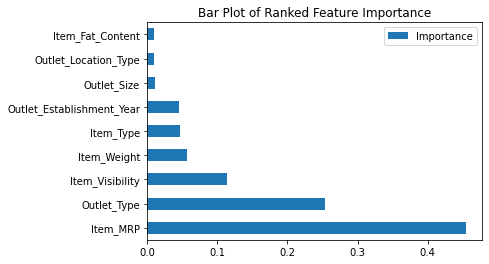

In [147]:
#importance.plot(kind='bar')
importance.plot(kind='barh')

plt.title("Bar Plot of Ranked Feature Importance")
plt.show()

In [148]:
#Discarding features with feature coefficients less than 0.01

to_keep = importance[importance['Importance'] > 0.01].index

X_new = X[to_keep].copy()

X_new


,Item_MRP,Outlet_Type,Item_Visibility,Item_Weight,Item_Type,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type
0,249.8092,1,0.016047,9.300,4,1999,1,0
1,48.2692,2,0.019278,5.920,14,2009,1,2
2,141.6180,1,0.016760,17.500,10,1999,1,0
3,182.0950,0,0.000000,19.200,6,1998,1,2
4,53.8614,1,0.000000,8.930,9,1987,0,2
...,...,...,...,...,...,...,...,...
8518,214.5218,1,0.056783,6.865,13,1987,0,2
8519,108.1570,1,0.046982,8.380,0,2002,1,1
8520,85.1224,1,0.035186,10.600,8,2004,2,1
8521,103.1332,2,0.145221,7.210,13,2009,1,2


## Decision trees and ensemble methods do not require feature scaling to be performed as they are not sensitive to the the variance in the data.
Trees can handle both continuous and categorical variables. No feature scaling required: There is no requirement of feature scaling techniques such as standardization and normalization in the case of Decision Tree as it uses a rule-based approach instead of calculation of distances.

In [149]:
x_train_f,x_test_f,y_train_f,y_test_f = train_test_split(X_new,y,test_size = 0.30, random_state= 355)

In [150]:
print('-'*30,' Shape of train and test dataset ','-'*30)
print('X train : {}, y train: {}'.format(x_train_f.shape, y_train_f.shape))
print('X test : {}, y test: {}'.format(x_test_f.shape, y_test_f.shape))
print('-'*100)

------------------------------  Shape of train and test dataset  ------------------------------
X train : (5966, 8), y train: (5966,)
X test : (2557, 8), y test: (2557,)
----------------------------------------------------------------------------------------------------


# Hyper parameter

In [151]:
from sklearn.model_selection import RandomizedSearchCV

In [152]:
random_param = {
    
    "n_estimators":[10,20,30], 
    'criterion': ["squared_error","poisson", "absolute_error"], 
    'max_depth' : [3,4,5,6],
    'min_samples_leaf' : [0.04,0.06,0.08],
    'min_samples_split': [2,3,4],
    "bootstrap":[True,False] 
    
}

random_search = RandomizedSearchCV(estimator=model_1,
                     param_distributions=random_param,random_state=42,
                     cv=5,
                    n_jobs =-1,verbose=2)

In [153]:
random_search.fit(x_train_f,y_train_f)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['squared_error',
                                                      'poisson',
                                                      'absolute_error'],
                                        'max_depth': [3, 4, 5, 6],
                                        'min_samples_leaf': [0.04, 0.06, 0.08],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': [10, 20, 30]},
                   random_state=42, verbose=2)

In [154]:
best_parameters = random_search.best_params_
print(best_parameters)


{'n_estimators': 20, 'min_samples_split': 4, 'min_samples_leaf': 0.04, 'max_depth': 5, 'criterion': 'absolute_error', 'bootstrap': True}


In [155]:
print("Mean cross-validated score of the best_estimator:",random_search.best_score_ )

Mean cross-validated score of the best_estimator: 0.4977131663434887


In [156]:
model_3=RandomForestRegressor(n_estimators= 20, min_samples_split= 4, min_samples_leaf= 0.04, max_depth= 5, criterion= 'absolute_error', bootstrap= True)

model_3.fit(x_train_f,y_train_f)

RandomForestRegressor(criterion='absolute_error', max_depth=5,
                      min_samples_leaf=0.04, min_samples_split=4,
                      n_estimators=20)

In [157]:
y_hat_5=model_3.predict(x_train_f)

print("Train data score",model_3.score(x_train_f,y_train_f))
print("Train data r2_score",r2_score(y_train_f,y_hat_5))
print("Train data MSE:",mean_squared_error(y_train_f,y_hat_5))
print("Train data MAE:",mean_absolute_error(y_train_f,y_hat_5))
print("Train data RMSE:",np.sqrt(mean_squared_error(y_train_f,y_hat_5)))

Train data score 0.5184812637748764
Train data r2_score 0.5184812637748764
Train data MSE: 1418179.8091726203
Train data MAE: 855.9091488744551
Train data RMSE: 1190.8735487752763


In [158]:
y_hat_6=model_3.predict(x_test_f)

print("Test data score",model_3.score(x_test_f, y_test_f))
print("Test data r2_score",r2_score(y_test_f,y_hat_6)) # (coefficient of determination) regression score function.(1.0)
print("Test data MSE:",mean_squared_error(y_test_f,y_hat_6))
print("Test data MAE:",mean_absolute_error(y_test_f,y_hat_6))
print("Test data RMSE:", np.sqrt(mean_squared_error(y_test_f,y_hat_6)))

Test data score 0.5208044993419572
Test data r2_score 0.5208044993419572
Test data MSE: 1357692.13945742
Test data MAE: 839.9191788678139
Test data RMSE: 1165.200471789048


In [159]:
predict_dataframe_hy=pd.DataFrame({"Real Values":y_test_f, "Predicted Values" :y_hat_6})
predict_dataframe_hy.head()

,Real Values,Predicted Values
4424,3171.8712,3962.192445
4634,215.7192,1259.826760
6108,5033.4480,2848.525430
1371,1867.5690,1601.315580
5797,1605.9096,1461.713965


In [160]:
# SAVE MODEL
import pickle

filename = 'Store price.pickle'
pickle.dump(model_3, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))

In [161]:
# Evaluation

In [162]:
test = test_data[to_keep].copy()

test

,Item_MRP,Outlet_Type,Item_Visibility,Item_Weight,Item_Type,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type
0,107.8622,1,0.007565,20.750000,13,1999,1,0
1,87.3198,1,0.038428,8.300000,4,2007,1,1
2,241.7538,0,0.099575,14.600000,11,1998,1,2
3,155.0340,1,0.015388,7.315000,13,2007,1,1
4,234.2300,3,0.118599,12.695633,4,1985,1,2
...,...,...,...,...,...,...,...,...
5676,141.3154,1,0.013496,10.500000,13,1997,2,0
5677,169.1448,2,0.142991,7.600000,15,2009,1,2
5678,118.7440,1,0.073529,10.000000,8,2002,1,1
5679,214.6218,1,0.000000,15.300000,3,2007,1,1


In [163]:
y_h=model_3.predict(test)

In [164]:
y_h

array([1575.599055, 1351.058005, 1378.33916 , ..., 1771.510705,
       3728.396775, 1245.029355])

In [165]:
l=[107.8622,1,0.007565,20.750000,1999,13,1,0]
arr=np.array(l)
model_3.predict(arr.reshape(1,-1))

array([1672.705985])

In [166]:
arr.reshape(1,-1) 

array([[1.078622e+02, 1.000000e+00, 7.565000e-03, 2.075000e+01,
        1.999000e+03, 1.300000e+01, 1.000000e+00, 0.000000e+00]])

In [167]:
df=pd.DataFrame({"Predicted Values" :y_h})
df

,Predicted Values
0,1575.599055
1,1351.058005
2,1378.339160
3,2443.952060
4,3866.883175
...,...
5676,2108.372215
5677,2839.037780
5678,1771.510705
5679,3728.396775


In [168]:
frames = [test,df]
new=pd.concat(frames, axis=1, join="inner")

In [169]:
new

,Item_MRP,Outlet_Type,Item_Visibility,Item_Weight,Item_Type,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Predicted Values
0,107.8622,1,0.007565,20.750000,13,1999,1,0,1575.599055
1,87.3198,1,0.038428,8.300000,4,2007,1,1,1351.058005
2,241.7538,0,0.099575,14.600000,11,1998,1,2,1378.339160
3,155.0340,1,0.015388,7.315000,13,2007,1,1,2443.952060
4,234.2300,3,0.118599,12.695633,4,1985,1,2,3866.883175
...,...,...,...,...,...,...,...,...,...
5676,141.3154,1,0.013496,10.500000,13,1997,2,0,2108.372215
5677,169.1448,2,0.142991,7.600000,15,2009,1,2,2839.037780
5678,118.7440,1,0.073529,10.000000,8,2002,1,1,1771.510705
5679,214.6218,1,0.000000,15.300000,3,2007,1,1,3728.396775


In [170]:
7//2

3

In [171]:
m=[1,2,3,4]
m.remove(2)

In [172]:
print(m)

[1, 3, 4]


In [173]:
5!=6

True

In [175]:
y="stuff;thing;junk"
z=y.split(";")
len(z)

3

In [178]:
x={1,2,3,5,6,}
x.add(6)

In [179]:
x

{1, 2, 3, 5, 6}